In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Obliczenie całki oznaczonej: $$ \int^{1}_{-1} \sqrt{1-x^{2}} $$

Text(0, 0.5, 'y')

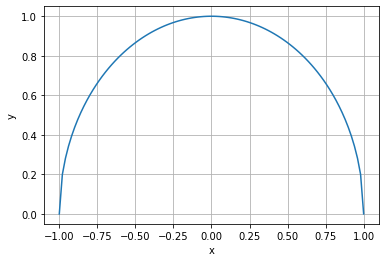

In [286]:
x=np.linspace(-1,1,100)
y=np.sqrt(1-x**2)

plt.plot(x,y)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")


### a) SciPy

In [81]:
import scipy.integrate as integrate
from scipy.integrate import quad

In [287]:
def integrand(x):
    return np.sqrt(1-x**2)

I = quad(integrand,-1, 1)

print("Wynik całkowania: ",I)
print("1/2 pola koła o promieniu r-1 ", np.pi/2)

Wynik całkowania:  (1.5707963267948983, 1.0002354500215915e-09)
1/2 pola koła o promieniu r-1  1.5707963267948966


In [200]:
# help(quad)

### b) Metoda trapezów numerycznie
$$ \int^{x_{n}}_{x_{0}} f(x)dx\approx \sum^{n-1}_{i=0} \frac{h}{2} [f(x_{i+1})+f(x_{i}))]=h(\frac{1}{2} f_{0}+f_{1}+f_{2}+...+f_{n-1}+\frac{1}{2} f_{n}) $$

$$h=\frac{x_{n}-x_{0}}{n} $$

Jak zmienia się dokładność metody w zależności od liczby podprzedziałów

In [288]:
# Wyliczenie liczby podprzedziałów
a=-1
b=1
h=1/10
n=int((b-a)/h)
print("Liczba podprzedziałów: ",n)
x=np.linspace(-1,1,n+1)
print("Rozkład x: \n",x)

# Całkowanie
sum05=0.5*(np.sqrt(1-x[0]**2)+np.sqrt(1-x[-1]**2))  # Suma elementu 1 i n

sum1=0
for i in range(1,len(x)-1):
    sum1+=np.sqrt(1-x[i]**2)  # Suma i-tych elementów, i=2,..,n-1

sum=(sum05+sum1)*h # Wynik całkowania
print("Wynik całkowania: ",sum)

Liczba podprzedziałów:  20
Rozkład x: 
 [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
Wynik całkowania:  1.5522591631241591


### c) Metoda trapezów w SciPY

In [289]:
from scipy.integrate import trapz

def f(x):
    return np.sqrt(1-x**2)

y=f(x)
print(x)

trapz(y,dx=1/10)

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


1.5522591631241593

### d) Metoda simpsona numerycznie
$$\int^{x_{2n}}_{x_{0}} f(x)dx\approx \frac{h}{3} [f_{0}+f_{2n}+4(f_{1}+f_{3}+...+f_{2n-1})+2(f_{2}+f_{4}+...+f_{2n-2})]$$

$$h=\frac{x_{2n}-x_{0}}{2n} $$

Jak zmienia się dokładność metody w zależności od liczby podprzedziałów

In [290]:
# Wyliczenie liczby podprzedziałów
a=-1
b=1
h=1/2
n=int((b-a)/h)
print("Liczba podprzedziałów: ",n)
x=np.linspace(-1,1,n+1)
print("Rozkład x: \n",x)


# Całkowanie
sum1=np.sqrt(1-x[0]**2)+np.sqrt(1-x[-1]**2)  # Suma elementu 1 i n

sum4=0
for i in range(1,len(x)-1,2):
    sum4+=4*np.sqrt(1-x[i]**2)  # Suma i-tych elementów, i=1,2,..,n-1

sum2=0
for i in range(2,len(x)-2,2):
    sum2+=2*np.sqrt(1-x[i]**2)  # Suma i-tych elementów, i=2,4,..,n-2

sum=(sum1+sum4+sum2)*h/3 # Wynik całkowania
print("Wynik całkowania: ",sum)

Liczba podprzedziałów:  4
Rozkład x: 
 [-1.  -0.5  0.   0.5  1. ]
Wynik całkowania:  1.4880338717125847


### e) Metoda simpsona w SciPy


In [181]:
from scipy.integrate import simps

In [182]:
print(x)

[-1.  -0.5  0.   0.5  1. ]


In [293]:
def f(x):
    return np.sqrt(1-x**2)

y=f(x)

simps(y,dx=0.5)

1.4880338717125847

### f) Kwadratura Gaussa numerycznie oraz w Scipy
$$\int^{1}_{-1} x^{2}dx=0.666667$$

In [301]:
from scipy import integrate
f= lambda x:x**2


# Kwadratura Gaussa numerycznie: 
I1=f(-1/np.sqrt(3))+f(1/np.sqrt(3))
print("Kwadratura numerycznie: ",I1)

# Kwadratura Gaussa w SciPy: 
I2=integrate.quadrature(f,-1,1)

print("Kwadratura w SciPy: ",I2)

Kwadratura numerycznie:  0.6666666666666669
Kwadratura w SciPy:  (0.666666666666667, 3.3306690738754696e-16)


Rozwiązywanie układów równań nieliniowych: funkcja solve pakietu SciPy

$$2=c_{1}+c_{2}$$
$$0=c_{1}x_{1}+c_{2}x_{2}$$
$$\frac{2}{3} =c_{1}x^{2}_{1}+c_{2}x^{2}_{2}$$
$$0=c_{1}x^{3}_{1}+c_{2}x^{3}_{2}$$

In [295]:
from scipy.optimize import fsolve
def func(x):
    return [x[0]+x[1]-2,
            x[0]*x[2]+x[1]*x[3],
            x[0]*x[2]**2+x[1]*x[3]**2-2/3,
            x[0]*x[2]**3+x[1]*x[3]**3 ]
root = fsolve(func, [1, 1,1,1])

print("Pierwiastki układu równań nieliniowych: ",root)


Pierwiastki układu równań nieliniowych:  [ 1.          1.         -0.57735027  0.57735027]


### g) Błąd kwadratury Gaussa

$$\int^{1}_{-1} x^{4}dx=0.4$$

In [300]:
# Kwadratura Gaussa: 
f= lambda x:x**4
I1=f(-1/np.sqrt(3))+f(1/np.sqrt(3))
print("Kwadratura numerycznie: ",I1)

# Kwadratura Gaussa w SciPy: 
I2=integrate.quadrature(f,-1,1)

print("Kwadratura w SciPy: ",I2)

Kwadratura numerycznie:  0.22222222222222235
Kwadratura w SciPy:  (0.39999999999999986, 2.7755575615628914e-16)


$$\int^{1}_{-1} cos(x)dx=1.682941969615793$$

In [299]:
# Kwadratura Gaussa: 
f= lambda x:np.cos(x)
I1=f(-1/np.sqrt(3))+f(1/np.sqrt(3))
print("Kwadratura numerycznie: ",I1)

# Kwadratura Gaussa w SciPy: 
I2=integrate.quadrature(f,-1,1)

print("Kwadratura w SciPy: ",I2)

Kwadratura numerycznie:  1.6758236553899861
Kwadratura w SciPy:  (1.6829419696142796, 7.929128464922996e-10)
